In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedKFold, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
import seaborn as sns

In [54]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
from xgboost import XGBRegressor
from catboost import Pool
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, Lasso, LassoLarsIC, Ridge, RidgeCV, LassoCV, LassoLarsCV, SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

Read Files

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
full_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/train.csv')
pd.set_option('display.max_rows', 81)
full_df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


#EDA

In [58]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Outlier Identification

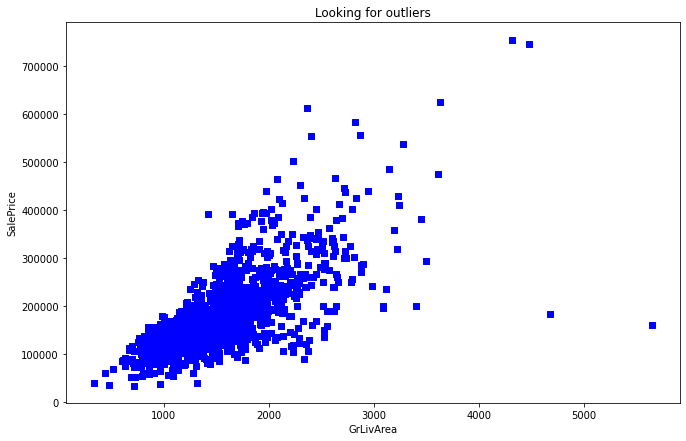

In [59]:
plt.figure(figsize=(11,7))
plt.scatter(full_df.GrLivArea, full_df.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [60]:
# Remocing rows which have area more than 4000
full_df = full_df[full_df.GrLivArea < 4000]

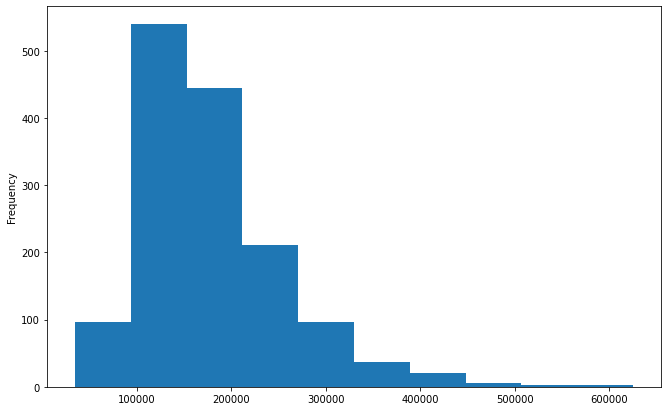

In [61]:
plt.figure(figsize=(11,7))
full_df.SalePrice.plot.hist();

In [62]:
# Prices grater than 450000 might be outliers
# full_df = full_df[full_df.SalePrice < 450000]
# print(len(df_outliers))
# df_outliers.SalePrice.plot.hist();

###Cleaning Data

In [63]:
# df2.drop(["Id",],axis=1,inplace=True)
# traindata.drop("Id", axis=1, inplace=True)
# df2.head()
# traindata.head()
# sns.heatmap(traindata.isnull(),yticklabels=False, cbar=False)
def checkNullValues(cData):
  for col in cData:
    # print(col)
    if cData[col].isnull().sum() > 0:
      print(col, cData[col].isnull().sum(), cData[col].dtype)

# print('Train Data Shape', traindata.shape)
checkNullValues(full_df)

LotFrontage 259 float64
Alley 1365 object
MasVnrType 8 object
MasVnrArea 8 float64
BsmtQual 37 object
BsmtCond 37 object
BsmtExposure 38 object
BsmtFinType1 37 object
BsmtFinType2 38 object
Electrical 1 object
FireplaceQu 690 object
GarageType 81 object
GarageYrBlt 81 float64
GarageFinish 81 object
GarageQual 81 object
GarageCond 81 object
PoolQC 1451 object
Fence 1176 object
MiscFeature 1402 object


In [64]:
full_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
full_df.shape

(1456, 81)

In [66]:
# if((full_df['YearRemodAdd'])>(full_df['YearBuilt'])):
#   full_df['YearRemodAdd']=1
# else:
#   full_df['YearRemodAdd']=0
full_df['YearRemodAdd'] = full_df['YearRemodAdd'] - full_df['YearBuilt']
full_df['ageInYears'] = (full_df['YrSold'] + full_df['MoSold']/12) - full_df['YearBuilt']

In [67]:
full_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ageInYears
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5.166667
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31.416667
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7.750000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91.166667
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,9.000000


In [68]:
full_df.drop(['YrSold','MoSold','YearBuilt'], axis=1, inplace=True)

In [69]:
'''
***to fill the missing data, fuction will reduce lines as well as save me from repeation. Now ***Keep in mind***
****Use that Fuction After you have Droped All the Columns which you think they need to be droped*******
'''
def filldata(cData):
  for col in cData:
    # print(col)
    if cData[col].isnull().sum() > 0:
      if cData[col].dtype == 'float64':
        # print(col, cData[col].isnull().sum(), cData[col].dtype)
        cData[col] = cData[col].fillna(cData[col].mode()[0])
        print(col , ' Mode ' , (cData[col].mode()[0]))
        print(col , ' Mean ' , (cData[col].mean()))
      elif cData[col].dtype == 'object':
        cData[col] = cData[col].fillna(cData[col].mode()[0])

In [70]:
# GarageType 81 object
# GarageYrBlt 81 float64
# GarageFinish 81 object
# GarageQual 81 object
# GarageCond 81 object
# GarageYrBlt = full_df[(full_df.GarageYrBlt.isnull())]
# GarageYrBlt = np.array(GarageYrBlt['Id'])

# GarageType = full_df[(full_df.GarageType.isnull())]
# GarageType = np.array(GarageType['Id'])

# GarageFinish = full_df[(full_df.GarageFinish.isnull())]
# GarageFinish = np.array(GarageFinish['Id'])

# GarageQual = full_df[(full_df.GarageQual.isnull())]
# GarageQual = np.array(GarageQual['Id'])

# GarageCond = full_df[(full_df.GarageCond.isnull())]
# GarageCond = np.array(GarageCond['Id'])


In [71]:
# traindata['LotFrontage'].isnull().sum()
# print(GarageYrBlt)
# print(GarageType)
# print(GarageFinish)
# print(GarageQual)
# print(GarageCond)

In [72]:
# GarageYrBlt = GarageYrBlt - 1
# print(GarageYrBlt)
# GarageType

In [73]:
#drop any rows that have 7 or 11 in the rebounds column
# df = df[df.rebounds.isin(values) == False]
# full_df = full_df[full_df.Id.isin(GarageType) == False]
# full_df.drop([GarageYrBlt], axis=0, inplace=True)
# null_df = full_df[(full_df.GarageFinish.isnull())]
# full_df = full_df - null_df
# full_df

In [74]:
checkNullValues(full_df)

LotFrontage 259 float64
Alley 1365 object
MasVnrType 8 object
MasVnrArea 8 float64
BsmtQual 37 object
BsmtCond 37 object
BsmtExposure 38 object
BsmtFinType1 37 object
BsmtFinType2 38 object
Electrical 1 object
FireplaceQu 690 object
GarageType 81 object
GarageYrBlt 81 float64
GarageFinish 81 object
GarageQual 81 object
GarageCond 81 object
PoolQC 1451 object
Fence 1176 object
MiscFeature 1402 object


In [75]:
full_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,ageInYears
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Normal,208500,5.166667
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Normal,181500,31.416667
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Normal,223500,7.750000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Abnorml,140000,91.166667
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Normal,250000,9.000000


Dropping Those Columns which have more than 50% (more than 750) missing values

In [76]:
full_df.drop(['Id'], axis=1, inplace=True)
full_df.drop(['Alley'], axis=1, inplace=True)
full_df.drop(['PoolQC'], axis=1, inplace=True)
full_df.drop(['Fence'], axis=1, inplace=True)
full_df.drop(['MiscFeature'], axis=1, inplace=True)

In [77]:
full_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,ageInYears
count,1456.000000,1197.000000,1456.000000,1456.000000,1456.000000,1456.000000,1448.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,56.888736,69.693400,10448.784341,6.088599,5.576236,13.633929,102.087707,436.991071,46.677198,566.990385,...,471.568681,93.833791,46.221154,22.014423,3.418956,15.102335,2.055632,43.608516,180151.233516,37.159054
std,42.358363,23.054474,9860.763449,1.369669,1.113966,24.500423,177.338930,430.255052,161.522376,442.197182,...,211.986421,125.192349,65.352424,61.192248,29.357056,55.828405,35.383772,496.799265,76696.592530,30.243828
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.333333
25%,20.000000,59.000000,7538.750000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,222.500000,...,329.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129900.000000,8.312500
50%,50.000000,69.000000,9468.500000,6.000000,5.000000,0.000000,0.000000,381.000000,0.000000,477.500000,...,478.500000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.583333
75%,70.000000,80.000000,11588.000000,7.000000,6.000000,20.000000,164.250000,706.500000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,54.916667
max,190.000000,313.000000,215245.000000,10.000000,9.000000,123.000000,1600.000000,2188.000000,1474.000000,2336.000000,...,1390.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,625000.000000,137.000000


In [78]:
filldata(full_df)

LotFrontage  Mode  60.0
LotFrontage  Mean  67.9690934065934
MasVnrArea  Mode  0.0
MasVnrArea  Mean  101.52678571428571
GarageYrBlt  Mode  2005.0
GarageYrBlt  Mean  1979.9175824175825


In [79]:
full_df.shape

(1456, 74)

In [80]:
# data = traindata['MSZoning'].value_counts()
# names = list(data.keys())
# print(names)
# print(data.dtype)
# values = list(data.values())
# plt.bar(names, values)
# plt.show()
# import seaborn as sns

Categorical Features

In [81]:
cat_features = full_df.select_dtypes(include=['object']).copy()

In [82]:
cat_df_cols = list(cat_features.columns)
full_df[cat_df_cols]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [83]:
cont_df = full_df.drop(cat_df_cols, axis = 1)
cont_df_cols = list(cont_df.columns)
# full_df[cont_df_cols] = scaler.fit_transform(full_df[cont_df_cols])
# full_df[cont_df_cols] = normalizer.fit_transform(full_df[cont_df_cols])
# normalized_df[cont_df_cols] = normalizer.fit_transform(normalized_df[cont_df_cols])

In [84]:
# correlation = full_df.corr()
# plt.figure(figsize=(25,25))
# sns.heatmap(correlation, annot=True)

###One Hot Encoding

Function For OneHot Encodding

In [85]:
def onehot_encode_multcol(multcolumns):
  df_final = full_df
  i = 0
  for fields in multcolumns:
    print(fields)
    dataframe = pd.get_dummies(full_df[fields],drop_first=True)
    full_df.drop([fields],axis=1,inplace=True)
    if i==0:
      df_final = dataframe.copy()
    else:
      df_final = pd.concat([df_final,dataframe], axis=1)
    i = i +1
 
  df_final = pd.concat([full_df,df_final], axis=1)
  return df_final

OneHot Encoding

In [86]:
full_df = onehot_encode_multcol(cat_df_cols)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [87]:
full_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,0,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,1,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,55,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,0,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [88]:
full_df.shape

(1456, 234)

In [89]:
full_df = full_df.loc[:,~full_df.columns.duplicated()]
full_df.shape

(1456, 174)

###Correlation

In [90]:
correlation = full_df.corr()
# plt.figure(figsize=(15,15))
# sns.heatmap(correlation, annot=True)
correlation['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.800858
GrLivArea      0.720516
GarageCars     0.649256
TotalBsmtSF    0.646584
                 ...   
No            -0.318208
Detchd        -0.361463
None          -0.379859
ageInYears    -0.535151
TA            -0.599459
Name: SalePrice, Length: 174, dtype: float64

Dropping Least Co-Related Features

In [91]:
sale_correlation = correlation['SalePrice'].sort_values(ascending=False)
# small_corr = sale_correlation[(sale_correlation < 0.1) & (sale_correlation > - 0.1)]
# small_corr = sale_correlation[(sale_correlation < 0.2) & (sale_correlation > - 0.2)]
# small_corr = sale_correlation[(sale_correlation < 0.3) & (sale_correlation > - 0.3)]
# small_corr = sale_correlation[(sale_correlation < 0.4) & (sale_correlation > - 0.4)]
# small_corr = sale_correlation[(sale_correlation < 0.5) & (sale_correlation > - 0.5)]
'''While tring to find which threshold of correlation should  be droped.
we discovered that increasing the absolute of (mode of) corelation more 0.1 decreases accuracy (increase in error)
and
decreasing the absolute of (mode of) corelation from 0.05 decreases accuracy (increase in error)
'''
# small_corr = sale_correlation[(sale_correlation < 0.04) & (sale_correlation > - 0.04)]
# small_corr = sale_correlation[(sale_correlation < 0.075) & (sale_correlation > - 0.075)]
small_corr = sale_correlation[(sale_correlation < 0.05) & (sale_correlation > - 0.05)]
drop_cols = list(small_corr.keys())
print(drop_cols)
# drop_cols
full_df.drop(drop_cols, axis=1, inplace=True)
full_df.shape
# for names in sale_correlation:
# sale_correlation[0:7]
# df_sale_corr = sale_correlation.to_frame()
# df_sale_corr

['Low', 'Mn', 'Other', '3SsnPorch', 'WdShake', 'Mod', 'PosA', 'IR3', 'Con', 'Pave', 'Gilbert', '2.5Fin', 'Stone', 'BrkFace', 'PoolArea', 'Sev', 'ImStucc', 'NWAmes', 'RRNn', 'Shed', 'Membran', 'CWD', 'FR3', 'SawyerW', 'ConLI', 'RRAn', 'TwnhsE', 'Tar&Grv', 'RRNe', 'Wood', 'Mansard', 'Metal', 'FR2', 'BsmtFinSF2', 'NoSeWa', 'Roll', 'Alloca', 'Plywood', 'GasW', 'Blueste', 'MiscVal', 'LowQualFinSF', 'CBlock', '2.5Unf', 'OthW', 'AsphShn', 'ConLw', 'Stucco', 'Basment', 'Lvl', 'Po', 'Gambrel', 'Oth', 'BsmtHalfBath', 'SLvl', 'NPkVill', 'Mix', 'Wd Shng', 'ConLD', 'Family', 'RRAe', 'Brk Cmn', 'FuseP']


(1456, 111)

In [92]:
full_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,BuiltIn,CarPort,Detchd,RFn,P,New,WD,AdjLand,Normal,Partial
0,60,65.0,8450,7,5,0,196.0,706,150,856,...,0,0,0,1,0,0,1,0,1,0
1,20,80.0,9600,6,8,0,0.0,978,284,1262,...,0,0,0,1,0,0,1,0,1,0
2,60,68.0,11250,7,5,1,162.0,486,434,920,...,0,0,0,1,0,0,1,0,1,0
3,70,60.0,9550,7,5,55,0.0,216,540,756,...,0,0,1,0,0,0,1,0,0,0
4,60,84.0,14260,8,5,0,350.0,655,490,1145,...,0,0,0,1,0,0,1,0,1,0


In [93]:
# df_Train = full_df.iloc[:1460,:]
# df_Test = full_df.iloc[1460:,:]

###Scalling

In [94]:
scaler = StandardScaler(copy=False)
# scaler.fit_transform(X.f3.values.reshape(-1, 1))
normalizer = MinMaxScaler()
# X_scaled = scaler.transform(X_train

In [95]:
normalized_df = full_df.drop(['SalePrice'],axis=1).copy()
# print(normalized_df.shape)
stand_df = full_df.drop(['SalePrice'],axis=1).copy()
target_values = full_df ['SalePrice'].apply(np.log)
full_df.drop(['SalePrice'],axis=1, inplace=True)
normalized_df = normalizer.fit_transform(normalized_df)
stand_df = scaler.fit_transform(stand_df)


normalized_df

###Splitting

In [96]:
x_train, x_test, y_train, y_test = train_test_split(full_df, target_values, test_size=0.2, random_state=1)
normalized_x_train, normalized_x_test, normalized_y_train, normalized_y_test = train_test_split(normalized_df, target_values, test_size=0.2, random_state=1)
stand_x_train, stand_x_test, stand_y_train, stand_y_test = train_test_split(stand_df, target_values, test_size=0.2, random_state=1)


###Regression

#### Multiple Models and Selecting best

In [97]:
# 5 Fold Cross validation
kf = KFold(n_splits=5, shuffle=True)
cv_scores, cv_std = [], []

In [98]:
# Creation of the RMSE metric:    
def rmse(model):
    return np.sqrt(-cross_val_score(model, stand_df, target_values, scoring="neg_mean_squared_error", cv=kf))


In [99]:
def apply_learning_algorithm(model):
    score = rmse(model)
    cv_scores.append(score.mean())
    cv_std.append(score.std())

In [100]:
models = [
    Ridge(alpha = 10),
    LassoCV(alphas = [1, 0.1, 0.001, 0.0005]),
    XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1),
    LinearRegression(),                               # Linear Regression
    BayesianRidge(compute_score=True),     # Bayesian Ridge Regression
    LGBMRegressor(                         # Light Gradient Boost Regressor
                      objective='regression',
                      num_leaves=5,
                      learning_rate=0.05, 
                      n_estimators=720,
                      max_bin = 55, 
                      bagging_fraction = 0.8,
                      bagging_freq = 5, 
                      feature_fraction = 0.2319,
                      feature_fraction_seed=9, 
                      bagging_seed=9,
                      min_data_in_leaf =6, 
                      min_sum_hessian_in_leaf = 11),
    SVR(kernel='rbf', C=1000000, epsilon=0.001),                                 # Support Vector Regression
    DecisionTreeRegressor(),               # Decision Tree Regressor
    RandomForestRegressor(n_estimators=1000),               # Random Forest Regressor
    XGBRegressor(                          # XGB Regressor
                      colsample_bytree=0.4603, 
                      gamma=0.0468, 
                      learning_rate=0.05, 
                      max_depth=3, 
                      min_child_weight=1.7817, 
                      n_estimators=2200,
                      reg_alpha=0.4640, 
                      reg_lambda=0.8571,
                      subsample=0.5213),
    GradientBoostingRegressor(             # Gradient Boost Regressor
                      n_estimators=3000, 
                      learning_rate=0.05,
                      max_depth=4, 
                      max_features='sqrt',
                      min_samples_leaf=15, 
                      min_samples_split=10, 
                      loss='huber'),
    CatBoostRegressor(),                   # Cat Boost Regressor
    StackingRegressor(                     # Stacked Regressor
                      regressors=(CatBoostRegressor(),
                                  LinearRegression(),
                                  BayesianRidge(),
                                  GradientBoostingRegressor()),
                                  meta_regressor = CatBoostRegressor(),
                                  use_features_in_secondary = True),
    make_pipeline(                         # Lasso Regression
                      RobustScaler(), 
                      Lasso(alpha =0.0005)),
    make_pipeline(                         # Elastic Net Regression
                      RobustScaler(), 
                      ElasticNet(alpha=0.0005, l1_ratio=.9)),
    KernelRidge(                           # Kernel Ridge Regression
                      alpha=0.6, 
                      kernel='polynomial', 
                      degree=2, 
                      coef0=2.5),
]

In [101]:
model_names = [
    'Ridge',
    'LassoCV', 
    'XGBRegressor.',
    'LinearRegression',
    'BayesianRidge', 
    'LGBMRegressor.',
    'SupportVectorRegressor', 
    'DecisionTreeRegressor',
    'RandomForestRegressor', 
    'XGBRegressor', 
    'GradientBoostingRegressor', 
    'CatBoostRegressor',
    'StackingRegressor',
    'LassoRegressor',
    'ElasticNetRegressor',
    'KernelRidgeRegressor'
]

In [102]:
for model in models:
    apply_learning_algorithm(model)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.3373198	total: 51.8ms	remaining: 10.3s
5:	learn: 0.3263904	total: 58.7ms	remaining: 9.72s
6:	learn: 0.3166814	total: 65.5ms	remaining: 9.29s
7:	learn: 0.3063288	total: 72.1ms	remaining: 8.94s
8:	learn: 0.2965922	total: 78.9ms	remaining: 8.69s
9:	learn: 0.2871916	total: 85.7ms	remaining: 8.48s
10:	learn: 0.2780089	total: 92.4ms	remaining: 8.31s
11:	learn: 0.2695001	total: 99.1ms	remaining: 8.16s
12:	learn: 0.2611418	total: 106ms	remaining: 8.04s
13:	learn: 0.2529970	total: 113ms	remaining: 7.93s
14:	learn: 0.2452507	total: 120ms	remaining: 7.85s
15:	learn: 0.2382986	total: 126ms	remaining: 7.76s
16:	learn: 0.2327708	total: 133ms	remaining: 7.7s
17:	learn: 0.2257560	total: 140ms	remaining: 7.63s
18:	learn: 0.2195276	total: 147ms	remaining: 7.57s
19:	learn: 0.2132719	total: 153ms	remaining: 7.51s
20:	learn: 0.2070955	total: 160ms	remaining: 7.46s
21:	learn: 0.2013232	total: 167ms	remaining: 7.41s
22:	learn: 0.1952058	total: 17

In [103]:
print('len(models):', len(models))
print('len(model_names)', len(model_names))
print('len(cv_scores):', len(cv_scores))
print('len(cv_std):', len(cv_std))

len(models): 16
len(model_names) 16
len(cv_scores): 16
len(cv_std): 16


In [104]:
cv_scores

[0.11312122866606471,
 0.11566080480849923,
 0.12079858123261329,
 0.11507008189111041,
 0.11381726470046072,
 0.11714140563162412,
 0.35773648667875835,
 0.20589722038714614,
 0.13833953400323187,
 0.11711035104113114,
 0.1175044382674543,
 0.11477953875479925,
 0.11691627270989077,
 0.11459155055021056,
 0.11259916675384352,
 0.10997636074880839]

In [105]:
cv_std

[0.008883920992021392,
 0.004714349975368944,
 0.005957547329718163,
 0.005594494011359439,
 0.009800743981565833,
 0.010200758536980293,
 0.15811638274577722,
 0.010652434140188528,
 0.00814580709300887,
 0.009429895375411291,
 0.00741787164165204,
 0.0065038246333234085,
 0.005635476114367527,
 0.005163049117037068,
 0.010697738469747677,
 0.014664338368261868]

In [106]:
final_cv_score = pd.DataFrame(model_names, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std
final_cv_score

,Regressors,RMSE_mean,RMSE_std
0,Ridge,0.113121,0.008884
1,LassoCV,0.115661,0.004714
2,XGBRegressor.,0.120799,0.005958
3,LinearRegression,0.115070,0.005594
4,BayesianRidge,0.113817,0.009801
5,LGBMRegressor.,0.117141,0.010201
6,SupportVectorRegressor,0.357736,0.158116
7,DecisionTreeRegressor,0.205897,0.010652
8,RandomForestRegressor,0.138340,0.008146
9,XGBRegressor,0.117110,0.009430


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


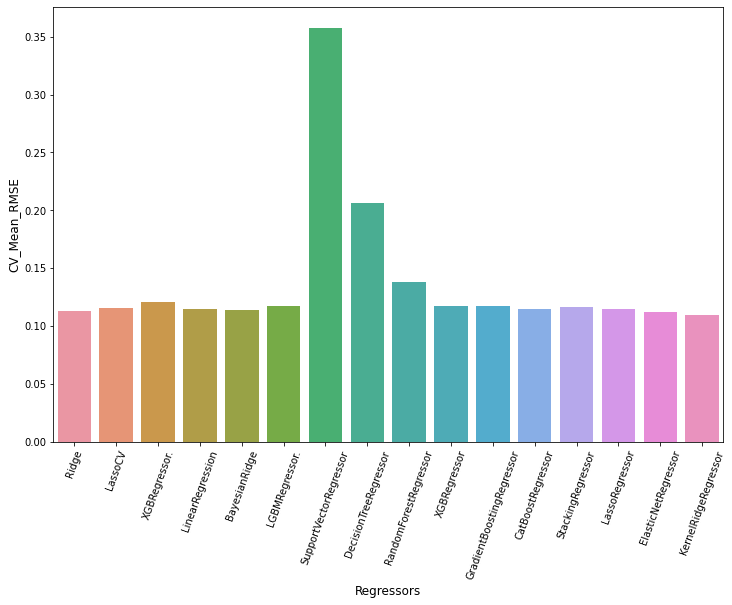

In [107]:
plt.figure(figsize = (12,8))
sns.barplot(final_cv_score['Regressors'],final_cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=70)
plt.show()

In [108]:
best_regressor_name = final_cv_score.sort_values(by=['RMSE_mean']).head(1)['Regressors'].iloc[0]
best_regressor_name

'KernelRidgeRegressor'

#### Old Experiments

In [109]:
reg = linear_model.LinearRegression()
nor = linear_model.LinearRegression()
stand = linear_model.LinearRegression()

In [110]:
# Training model
reg.fit(x_train,y_train)
nor.fit(normalized_x_train, normalized_y_train)
stand.fit(stand_x_train, stand_y_train)

LinearRegression()

In [111]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [112]:
y_predict = reg.predict(x_test)
train_predict = reg.predict(x_train)
stand_predict = stand.predict(stand_x_test)
nor_predict = nor.predict(normalized_x_test)
stand_train_pred = stand.predict(stand_x_train)
nor_train_pred = nor.predict(normalized_x_train)

###Raw Data

In [113]:
print('Errors on Training Dataset')
print('Absolute Error',mean_absolute_error(y_train, train_predict))
print('Squared Error',mean_squared_error(y_train, train_predict))
print('Root mean Squred Error',np.sqrt(mean_squared_error(y_train, train_predict)))
print('R Squared', r2_score(y_train, train_predict))

Errors on Training Dataset
Absolute Error 0.07295715937628225
Squared Error 0.009905192272405336
Root mean Squred Error 0.09952483244098097
R Squared 0.9351678197062256


In [114]:
print('Errors on Testing Dataset')
print('Absolute Error',mean_absolute_error(y_test, y_predict))
print('Squared Error',mean_squared_error(y_test, y_predict))
print('Root mean Squred Error',np.sqrt(mean_squared_error(y_test, y_predict)))
print('R Squared', r2_score(y_test, y_predict))

Errors on Testing Dataset
Absolute Error 0.07849239726837205
Squared Error 0.013243926486446535
Root mean Squred Error 0.11508225965128828
R Squared 0.9232724110173973


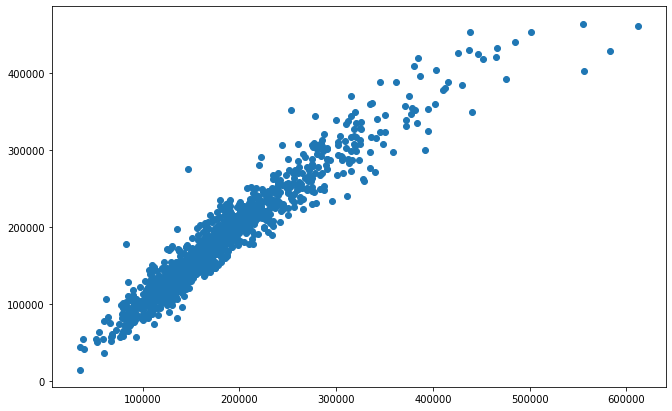

In [ ]:
plt.figure(figsize=(11,7))
plt.scatter(y_train, train_predict);

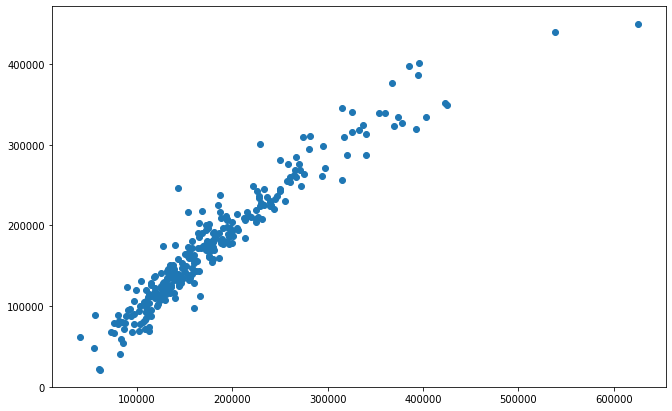

In [ ]:
plt.figure(figsize=(11,7))
plt.scatter(y_test, y_predict)

# Different Models

In [ ]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_test, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_test, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_test, val_preds)}
    return scores

In [ ]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [ ]:
show_scores(model)

{'Training MAE': 6573.892803550974,
 'Valid MAE': 16819.941523157206,
 'Training RMSLE': 0.05718469665241434,
 'Valid RMSLE': 0.13873528761693318,
 'Training R^2': 0.9825922240962692,
 'Valid R^2': 0.8903035621288639}

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

gr_model = GridSearchCV(RandomForestRegressor(n_jobs=-1), rf_grid)

gr_model.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'max_features': [0.5, 1, 'sqrt', 'auto'],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [ ]:
gr_model.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 70}

In [ ]:
show_scores(gr_model)

{'Training MAE': 6649.03972886697,
 'Valid MAE': 16501.827870166228,
 'Training RMSLE': 0.06103256097327657,
 'Valid RMSLE': 0.14298966127193752,
 'Training R^2': 0.9810030752965812,
 'Valid R^2': 0.8953600173465696}

In [ ]:
import pickle
filename = '/content/drive/MyDrive/Colab Notebooks/Project/bestModel.sav'
pickle.dump(gr_model, open(filename, 'wb'))

###Normalized

In [ ]:
print('Normalized')
print('Errors on Training Dataset')
print('Absolute Error',mean_absolute_error(normalized_y_train, nor_train_pred))
print('Squared Error',mean_squared_error(normalized_y_train, nor_train_pred))
print('Root mean Squred Error',np.sqrt(mean_squared_error(normalized_y_train, nor_train_pred)))
print('R Squared', r2_score(normalized_y_train, nor_train_pred))

Normalized
Errors on Training Dataset
Absolute Error 14880.901276848503
Squared Error 456951369.25307435
Root mean Squred Error 21376.42087097544
R Squared 0.9196784632450558


In [ ]:
print('Normalized')
print('Errors on Test Dataset')
print('Absolute Error',mean_absolute_error(normalized_y_test, nor_predict))
print('Squared Error',mean_squared_error(normalized_y_test, nor_predict))
print('Root mean Squred Error',np.sqrt(mean_squared_error(normalized_y_test, nor_predict)))
print('R Squared', r2_score(normalized_y_test, nor_predict))

Normalized
Errors on Test Dataset
Absolute Error 16437.612704796615
Squared Error 611504845.4066298
Root mean Squred Error 24728.624009568946
R Squared 0.9078067021173958


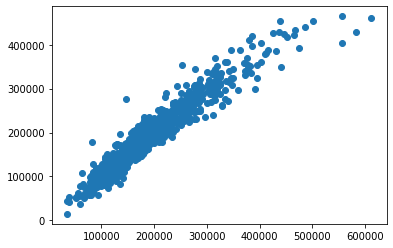

In [ ]:
plt.scatter(normalized_y_train, nor_train_pred)

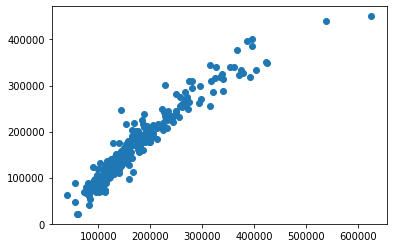

In [ ]:
plt.scatter(normalized_y_test, nor_predict)

###Standardized

In [ ]:
print('Standardized')
print('Errors on Training Dataset')
print('Absolute Error',mean_absolute_error(stand_y_train, stand_train_pred))
print('Squared Error',mean_squared_error(stand_y_train, stand_train_pred))
print('Root mean Squred Error',np.sqrt(mean_squared_error(stand_y_train, stand_train_pred)))
print('R Squared', r2_score(stand_y_train, stand_train_pred))

Standardized
Errors on Training Dataset
Absolute Error 14880.90127684849
Squared Error 456951369.25307435
Root mean Squred Error 21376.42087097544
R Squared 0.9196784632450558


In [ ]:
print('Standardized')
print('Errors on Testing Dataset')
print('Absolute Error',mean_absolute_error(stand_y_test, stand_predict))
print('Squared Error',mean_squared_error(stand_y_test, stand_predict))
print('Root mean Squred Error',np.sqrt(mean_squared_error(stand_y_test, stand_predict)))
print('R Squared', r2_score(stand_y_test, stand_predict))

Standardized
Errors on Testing Dataset
Absolute Error 16437.612704796513
Squared Error 611504845.4066273
Root mean Squred Error 24728.624009568895
R Squared 0.9078067021173961


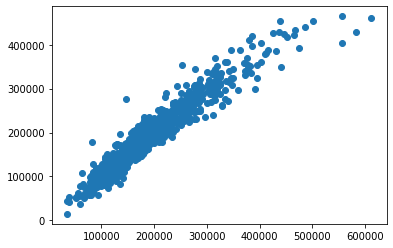

In [ ]:
plt.scatter(stand_y_train, stand_train_pred)

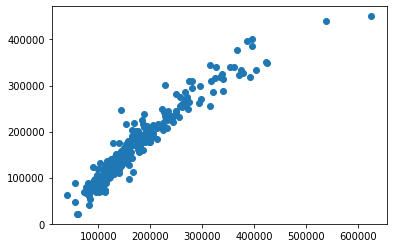

In [ ]:
plt.scatter(stand_y_test, stand_predict)